In [3]:
from keras.applications.mobilenet_v2 import MobileNetV2 
from keras.applications.mobilenet import MobileNet
from keras.applications.densenet import DenseNet169
from keras.applications.resnet50 import ResNet50
from keras.applications.nasnet import NASNetMobile, NASNetLarge
from keras.applications.xception import Xception
from keras.applications.inception_v3 import InceptionV3
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing.image import img_to_array
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from keras.models import Sequential, Model, load_model
from keras.layers import Input, Dense, Dropout, Flatten
from keras.optimizers import Adam, SGD, Adagrad, Adadelta
from keras import backend as K
from imutils import paths
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import argparse
import imutils
import random
import pickle
import cv2
import os

In [4]:
model_path = os.path.sep.join(['output', 'animal.model'])
le_path = os.path.sep.join(['output', 'le.pickle'])

In [5]:
lb = pickle.loads(open(le_path, "rb").read())
model = load_model(model_path)

australianbee


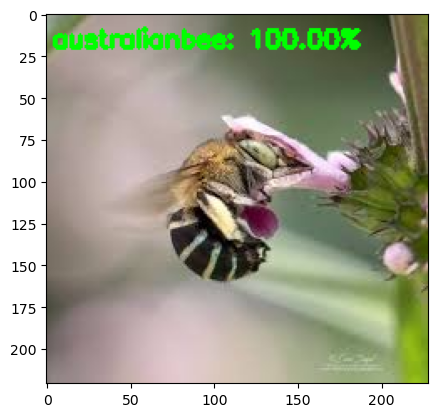

australianbee


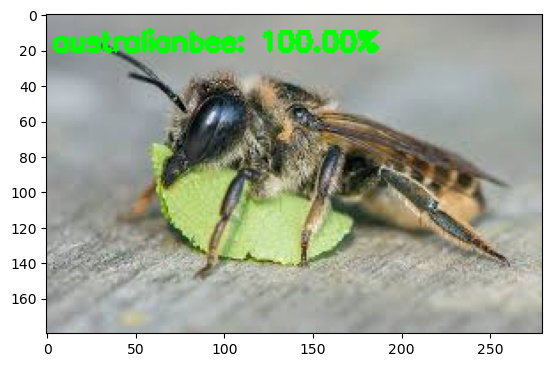

bluetonguedlizard


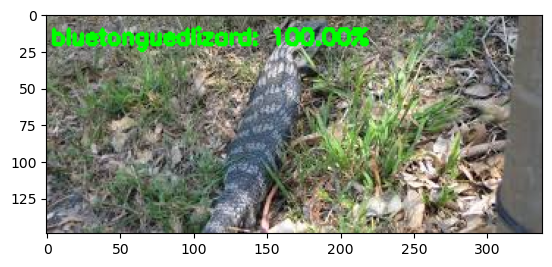

bluetonguedlizard


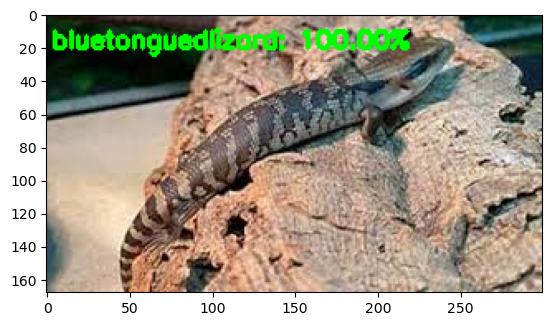

carpetpython


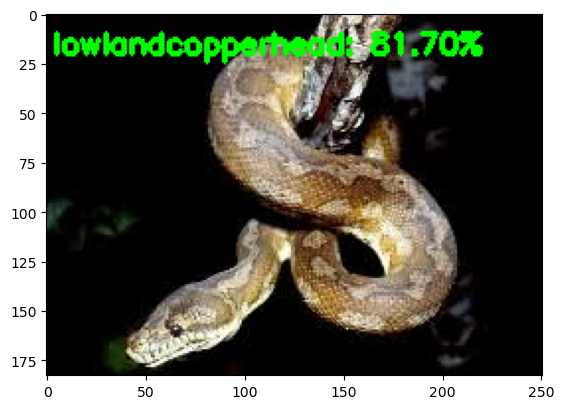

carpetpython


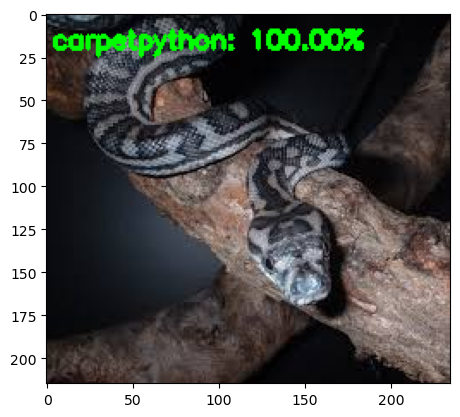

centralbeardeddragon


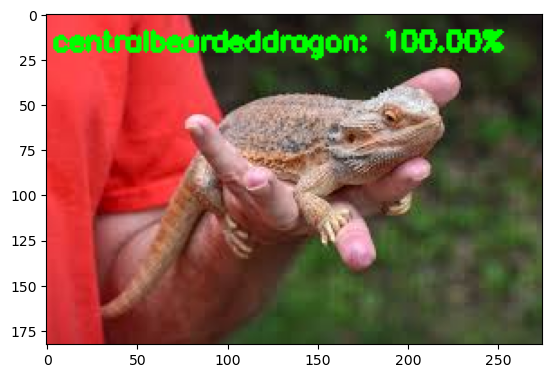

centralbeardeddragon


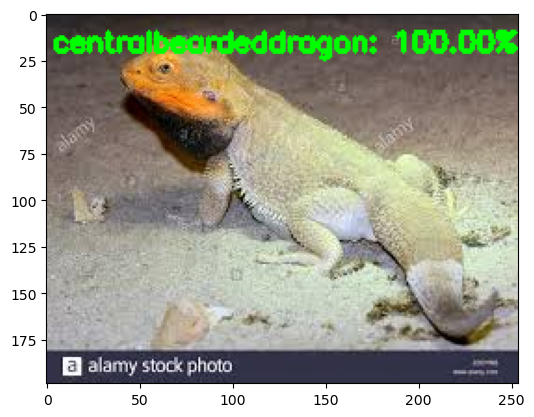

europeanwasp


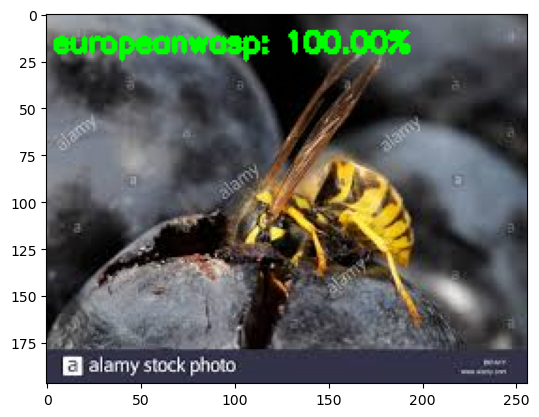

europeanwasp


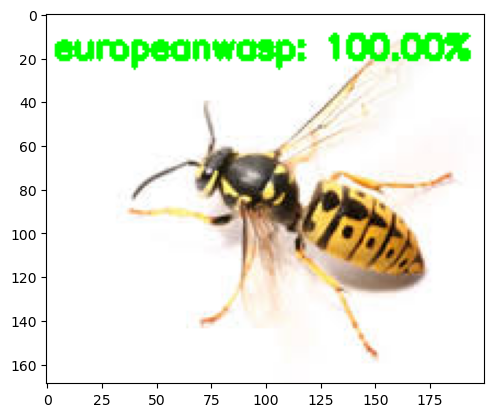

longlegsspider


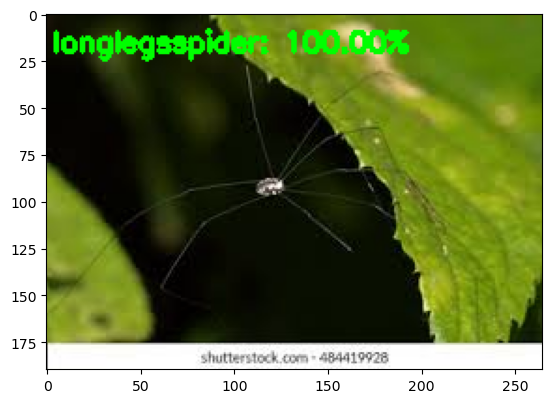

longlegsspider


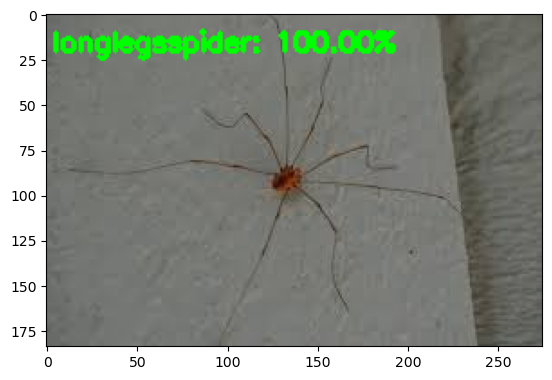

lowlandcopperhead


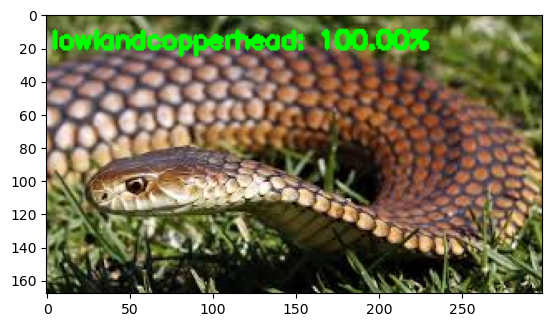

lowlandcopperhead


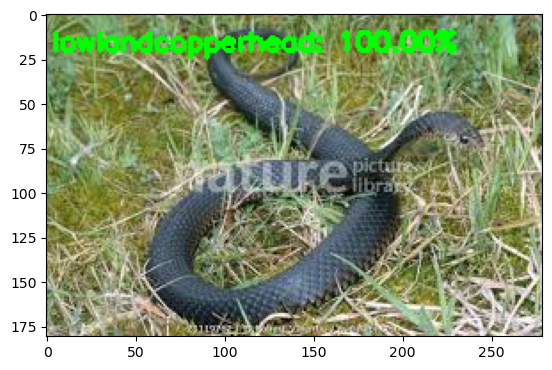

redback


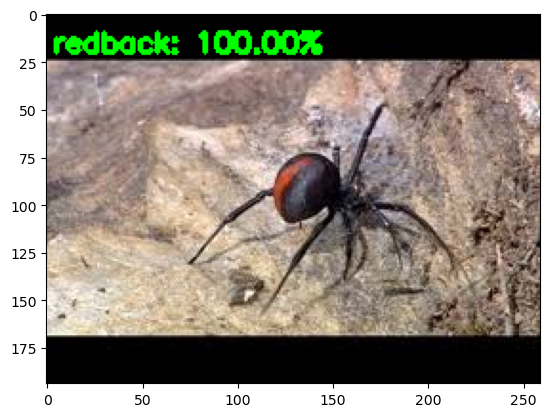

redback


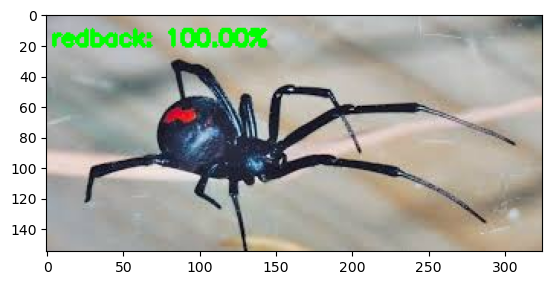

redbelliedblacksnake


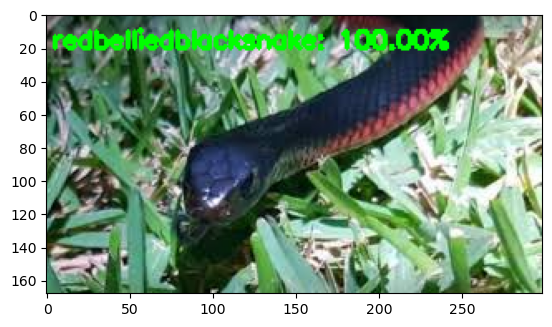

redbelliedblacksnake


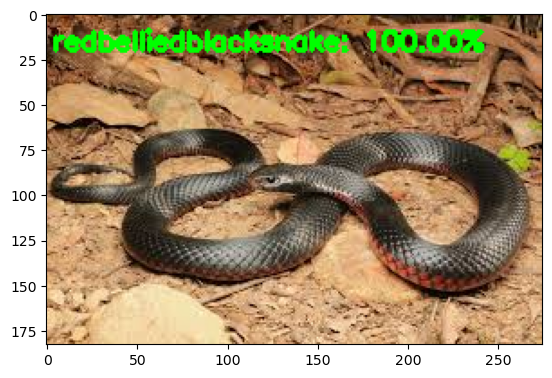

tarantula


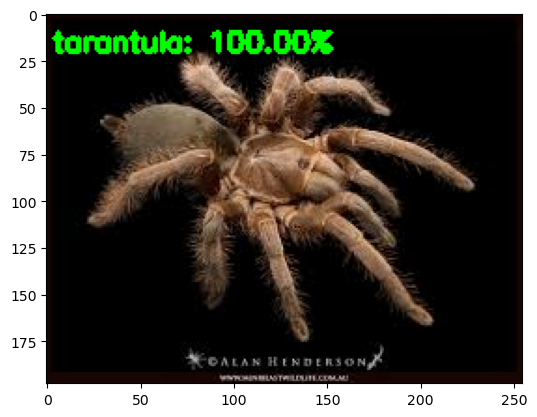

tarantula


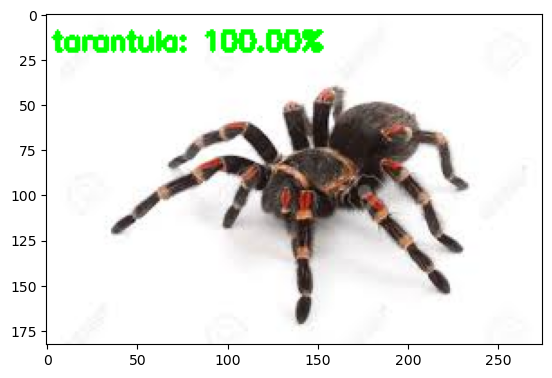

In [7]:
imagePaths = sorted(list(paths.list_images("test_animals")))
plt.style.use("default")
for x in imagePaths:
    true_label = x.split(os.path.sep)[-1]
    true_label = true_label.split('-')[0]
    print(true_label)
    
    image = cv2.imread(x)
    output = image.copy()

    image = cv2.resize(image, (224, 224))

    image = image.astype("float") / 255.0
    image = img_to_array(image)
    image = np.expand_dims(image, axis=0)
    
    proba = model.predict(image)[0]
    idx = np.argmax(proba)
    label = lb.classes_[idx]
    
    
    text = "{}: {:.2f}%".format(label, proba[idx]*100)
    cv2.putText(output, text, (3, 20), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)
    
    img = cv2.cvtColor(output, cv2.COLOR_BGR2RGB)
    
    
    
    plt.imshow(img)
    plt.show()

In [ ]:
imagePaths = sorted(list(paths.list_images("test")))
plt.style.use("default")
for x in imagePaths:
    # load the image
    image = cv2.imread(x)
    img = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    plt.imshow(img)
    plt.show()
    output = image.copy()

    # pre-process the image for classification
    # image = cv2.resize(image, (96, 96))
    image = cv2.resize(image, (224, 224))

    image = image.astype("float") / 255.0
    image = img_to_array(image)
    image = np.expand_dims(image, axis=0)
    
    # classify the input image
    proba = model.predict(image)[0]
    idx = np.argmax(proba)
    label = lb.classes_[idx]
    print(label)